In [1]:
import pandas as pd
import numpy as np

# ÉTAPE 1 : Chargement et exploration initiale des données

### 1. Chargement du dataset

In [46]:
df = pd.read_csv('data.csv', encoding='ISO-8859-1')

### 2. Aperçu des premières lignes

In [47]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### 3. Dimensions du dataset (lignes, colonnes)

In [48]:
df.shape

(541909, 8)

Cela signifie que notre jeu de données contient 541 909 entrées individuelles, chacune décrite par 8 caractéristiques différentes (comme InvoiceNo, StockCode, Quantity, etc.).

### 4. Informations sur les types de données

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


 Description et CustomerID contiennent des valeurs manquantes à traiter.

La colonne InvoiceDate est de type object, il faudra la convertir en datetime pour les analyses temporelles.

Le jeu de données occupe environ 33.1 Mo en mémoire.

### 5. Résumé statistique des colonnes numériques

In [50]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Des valeurs aberrantes sont présentes dans Quantity et UnitPrice → à nettoyer.

CustomerID a de nombreuses valeurs manquantes, à traiter selon l’analyse souhaitée.





### 6. Typologie des colonnes

In [51]:
print("Types de colonnes :\n", df.dtypes)

Types de colonnes :
 InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


### 7. Vérification des valeurs manquantes

In [52]:
# Total des valeurs manquantes par colonne
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

 Interprétation :
✅ La plupart des colonnes n'ont pas de valeurs manquantes, ce qui est très bon pour l’analyse.

⚠️ La colonne Description a 1 454 lignes manquantes, ce qui représente moins de 0.3 % du dataset → on peut envisager de supprimer ces lignes.

⚠️ La colonne CustomerID a 135 080 valeurs manquantes, soit environ 25 % du dataset :

On va décider par la suite: les supprimer, les remplacer (ex : par une valeur fictive), ou les garder si on n’analyse pas le client.

In [53]:
# Pourcentage de valeurs manquantes
(df.isnull().sum() / len(df)) * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

 Interprétation :
✅ La majorité des colonnes ne contiennent aucune valeur manquante.

⚠️ Description présente un faible taux de valeurs manquantes (0.27 %) → on peut supprimer ces lignes sans risque majeur pour l’analyse.

⚠️ CustomerID présente près de 25 % de valeurs manquantes, ce qui est significatif :

Si l’analyse repose sur le client, il faudra supprimer ou imputer.

Sinon, on peut conserver ces lignes pour des analyses globales sur les ventes.



In [54]:
#Afficher combien de valeurs négatives il y a
print("Quantités négatives :", (df['Quantity'] < 0).sum())
print("Prix unitaires négatifs ou nuls :", (df['UnitPrice'] <= 0).sum())

Quantités négatives : 10624
Prix unitaires négatifs ou nuls : 2517


Que faire ?
Pour les quantités négatives :

Si tu veux étudier uniquement les ventes, tu peux supprimer ces lignes.

Sinon, tu peux garder ces données et les analyser séparément comme retours.

Pour les prix unitaires négatifs ou nuls :

Les prix nuls peuvent être ignorés si ce sont des échantillons gratuits.

Les prix négatifs sont souvent des erreurs, il vaut mieux les exclure ou les vérifier.

### 8. Détection des doublons

In [55]:
# Nombre de doublons
df.duplicated().sum()

np.int64(5268)

🔁 Doublons dans le jeu de données
La commande df.duplicated().sum() indique que 5 268 lignes du dataset sont des doublons exacts.

👉 Cela signifie que ces lignes sont strictement identiques à d'autres lignes (même facture, même produit, etc.).

💡 Ces doublons doivent généralement être supprimés pour éviter de fausser les analyses (ventes, clients, produits…).



### 9.Analyse des variables catégorielles

In [56]:
### Liste des colonnes de type objet (souvent catégorielles)
df.select_dtypes(include='object').columns

Index(['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country'], dtype='object')

In [57]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

cela permet d’identifier les colonnes dont le type est object, c'est-à-dire souvent :

des chaînes de caractères (str)

ou des données non numériques (parfois mal typées)

# Etape 2 : Nettoyage et préparation des données


L'objectif de cette section est de nettoyer le jeu de données afin d'assurer la fiabilité de nos analyses. Nous allons :
- Supprimer les lignes incohérentes (prix négatif, quantité nulle, etc.)
- Éliminer les doublons
- Gérer les valeurs manquantes
- Convertir les types de données
- Ajouter des colonnes utiles (ex. : montant total, date transformée)

### 1. Suppression des lignes avec des valeurs incohérentes


Les quantités inférieures ou égales à zéro correspondent généralement à des retours, des erreurs de saisie ou des commandes annulées.  Ces lignes sont conservées pour analyser les retours et les annulations.

Un `UnitPrice` de 0 ou moins est une anomalie (produits offerts, erreurs, etc.). Ces lignes sont retirées pour ne pas biaiser le chiffre d'affaires.

In [58]:
# Supprimer les lignes avec UnitPrice <= 0 (produits gratuits ou erreurs)
df = df[df['UnitPrice'] > 0]

In [59]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132603
Country             0
dtype: int64



-> Les valeurs manquantes dans la colonne `Description` ont disparu après l’application du filtre `df = df[df['UnitPrice'] > 0]` car la majorité des lignes avec `Description` manquante avaient aussi un `UnitPrice` inférieur ou égal à 0. Elles ont donc été supprimées indirectement lors du filtrage.


### 2. Suppression des doublons

Les doublons exacts (mêmes valeurs sur toutes les colonnes) peuvent résulter d’une erreur d’export ou de saisie multiple. On les supprime pour éviter de fausser les analyses.

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
print("Nombre de doublons après suppression :", df.duplicated().sum())

Nombre de doublons après suppression : 0


 ### 3. Nettoyage des valeurs manquantes

Suppression des lignes sans `InvoiceDate`

Les lignes sans date de facture (`InvoiceDate = NaT`) ne peuvent pas être utilisées dans les analyses temporelles (chiffre d’affaires par mois, tendances, etc.). Par conséquent, elles sont supprimées du dataset principal, mais conservées dans un fichier à part pour une éventuelle revue manuelle.

- `InvoiceDate` est convertie en objet datetime pour permettre l'analyse temporelle.

In [17]:
df = df[df['InvoiceDate'].notnull()]

In [18]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132565
Country             0
dtype: int64

### 4. Conversion des types de données (exemple : InvoiceDate)

In [19]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

In [20]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132565
Country             0
dtype: int64

In [21]:
print("Types de colonnes :\n", df.dtypes)

Types de colonnes :
 InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


### 5. gérer les lignes sans identifiant client (`CustomerID`)

`CustomerID` est indispensable pour toutes les analyses client (segmentation, fidélité...). Les lignes sans identifiant sont supprimées.

Nous avons choisi de conserver deux versions du dataset :
- `df_all` : contient toutes les transactions, même anonymes. Cela permet d'analyser les ventes totales, produits et volumes.
- `df_clients` : contient uniquement les lignes avec un identifiant client, afin d'explorer les comportements clients (RFM, rétention, etc.).

In [22]:
df_all = df.copy()
df_clients = df[df['CustomerID'].notnull()].copy()

In [23]:
df_all.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132565
Country             0
dtype: int64

In [24]:
df_clients.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

- `CustomerID` est converti en int aprés avoir supprimer les valeurs manquantes pour df_clients


In [25]:
df_clients['CustomerID'] = df_clients['CustomerID'].astype(int)

In [26]:
print("Types de colonnes :\n", df_clients.dtypes)

Types de colonnes :
 InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object


# Etape 3 : Créaction des variables

### Création de la variable `TotalPrice`

Nous avons créé une variable **`TotalPrice`** afin de calculer le **montant total de chaque ligne de transaction**.

Cette variable est obtenue en multipliant :
- `Quantity` (le nombre d’unités commandées)
- `UnitPrice` (le prix unitaire du produit)

In [27]:
# Création de la variable TotalPrice = quantité * prix unitaire
df_all['TotalPrice'] = df_all['Quantity'] * df_all['UnitPrice']

In [28]:
df_all.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### Création des variables `IsReturn` et `IsCancelled`

Pour mieux analyser la qualité de service et le comportement des clients, nous avons créé deux variables dérivées :

- **`IsReturn`** : identifie si une ligne de transaction correspond à un retour produit.  
  → Une quantité négative (`Quantity < 0`) indique généralement un retour, ce qui est fréquent dans les ventes en ligne.

- **`IsCancelled`** : indique si la facture a été annulée.  
  → Les numéros de facture annulés commencent par la lettre **"C"** dans le dataset (ex : "C536379"), selon la documentation du fournisseur de données.

Ces deux variables permettent :
- D’exclure facilement les retours si nécessaire (par exemple pour analyser uniquement les ventes réussies).
- De mesurer le **taux de retour**, un indicateur clé de satisfaction et de qualité produit.
- D'identifier les **produits les plus retournés ou annulés**, ce qui peut signaler des problèmes de qualité ou de logistique.

In [29]:
# Création de la variable IsReturn : True si la quantité est négative
df_all['IsReturn'] = df_all['Quantity'] < 0

# Création de la variable IsCancelled : True si le numéro de facture commence par 'C'
df_all['IsCancelled'] = df_all['InvoiceNo'].astype(str).str.startswith('C')

In [30]:
df_all.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,IsReturn,IsCancelled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,False,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,False,False


### Création de variable `InvoiceHour`

Elle représente l’heure de la journée à laquelle une commande a été passée, extraite depuis la colonne InvoiceDate.

Cette variable permet d’analyser les heures d'activité des clients sur le site e-commerce. Elle peut être utilisée pour :
- Identifier les **pics de commandes** dans la journée

- Adapter les **campagnes marketing** à certaines heures

- **Optimiser les ressources** (support, logistique)

In [31]:

# Extraire l'heure de la journée (entre 0 et 23)
df_all['InvoiceHour'] = df_all['InvoiceDate'].dt.hour

# Afficher les premières lignes
print(df_all[['InvoiceDate', 'InvoiceHour']].head())

          InvoiceDate  InvoiceHour
0 2010-12-01 08:26:00            8
1 2010-12-01 08:26:00            8
2 2010-12-01 08:26:00            8
3 2010-12-01 08:26:00            8
4 2010-12-01 08:26:00            8


### Création de variable `InvoiceTotalItems`

Elle représente le **nombre total d’articles commandés dans une facture**. Elle se calcule en additionnant les quantités (Quantity) de toutes les lignes d’une même facture (InvoiceNo).

**Objectifs:**

- Analyser le comportement d’achat (Identifier les factures avec des achats en gros vs. des achats unitaires).
- Segmenter les clients ou les commandes:Catégoriser les commandes et Mieux cibler les campagnes marketing.
- Repérer les commandes anormales (fraude, erreurs, retours).


In [32]:
# Calculer le total d'articles par facture
invoice_totals = df_all.groupby('InvoiceNo')['Quantity'].sum().reset_index()
invoice_totals.rename(columns={'Quantity': 'InvoiceTotalItems'}, inplace=True)

# Fusionner avec le dataframe original
df_all = df_all.merge(invoice_totals, on='InvoiceNo', how='left')

# Afficher les colonnes pertinentes
print(df_all[['InvoiceNo', 'Quantity', 'InvoiceTotalItems']].head())

  InvoiceNo  Quantity  InvoiceTotalItems
0    536365         6                 40
1    536365         6                 40
2    536365         8                 40
3    536365         6                 40
4    536365         6                 40


### Création des variables spécifiques aux clients: `CustomerTotalSpent` et `CustomerNumOrders`

- `CustomerTotalSpent` :  représente le montant total dépensé par un client sur toute la période du dataset. On le calcule en multipliant Quantity × UnitPrice pour chaque ligne de commande, puis en additionnant par CustomerID.  
  
  → Cette variable permet d'identifier les clients les plus rentables et prioriser le service ou les offres VIP pour les clients à forte dépense. Elle permet aussi la détection de comportements inhabituels (erreur de facturation, fraude potentielle...)


- `CustomerNumOrders` : représente le nombre total de commandes uniques (factures) passées par un client (CustomerID). On compte le nombre de factures (InvoiceNo) différentes associées à chaque client.  
  
  → Cette variable permet de comprendre la fréquence d'achat (détecter les clients réguliers vs. occasionnels  et identifier les clients fidèles)

In [33]:
##CustomerTotalSpent:

# Création d'une colonne 'TotalPrice' dans la dataset df_clients
df_clients['TotalPrice'] = df_clients['Quantity'] * df_clients['UnitPrice']

# Calcul du total dépensé par client
customer_spent = df_clients.groupby('CustomerID')['TotalPrice'].sum().reset_index()
customer_spent.rename(columns={'TotalPrice': 'CustomerTotalSpent'}, inplace=True)

# Fusionner avec le dataframe original
df_clients = df_clients.merge(customer_spent, on='CustomerID', how='left')

# Affichage des 5 meilleurs clients
print(customer_spent.sort_values('CustomerTotalSpent', ascending=False).head())

      CustomerID  CustomerTotalSpent
1702       14646           279489.02
4232       18102           256438.49
3757       17450           187322.17
1894       14911           132458.73
55         12415           123725.45


In [34]:
## CustomerNumOrders
# Suppression des doublons de lignes de commande pour ne compter qu'une fois chaque facture par client
df_unique_orders = df_clients[['CustomerID', 'InvoiceNo']].drop_duplicates()

# Compter le nombre de factures uniques par client
customer_orders = df_unique_orders.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
customer_orders.rename(columns={'InvoiceNo': 'CustomerNumOrders'}, inplace=True)
# Fusionner avec le dataframe original
df_clients = df_clients.merge(customer_orders, on='CustomerID', how='left')
# Afficher les clients les plus actifs
print(customer_orders.sort_values('CustomerNumOrders', ascending=False).head())

      CustomerID  CustomerNumOrders
1894       14911                248
330        12748                223
4041       17841                169
1673       14606                128
2191       15311                118


In [35]:
# On suppose que df_clients contient CustomerID, CustomerTotalSpent, CustomerNumOrders

top_clients = df_clients[['CustomerID', 'CustomerTotalSpent', 'CustomerNumOrders']] \
    .drop_duplicates(subset='CustomerID') \
    .sort_values(by='CustomerTotalSpent', ascending=False) \
    .head(5)

print(top_clients)

       CustomerID  CustomerTotalSpent  CustomerNumOrders
24526       14646           279489.02                 76
10664       18102           256438.49                 62
9608        17450           187322.17                 55
1367        14911           132458.73                248
28318       12415           123725.45                 26



### Ajout de colonnes temporelles utiles à l’analyse

   - `YearMonth` : pour regrouper les données par mois (au format 'AAAA-MM')
   
   - `InvoiceHour` : pour extraire l'heure de la journée de la transaction
  
-> But : enrichir les jeux de données avec des informations temporelles dérivées de InvoiceDate afin de permettre des analyses par mois ou par heure (ex : saisonnalité, habitudes d’achat horaires).

In [60]:
# Ajout de colonnes
for df in [df_all, df_clients]:
    df['YearMonth'] = df['InvoiceDate'].dt.to_period('M').astype(str)
    df['InvoiceHour'] = df['InvoiceDate'].dt.hour

### Sauvegarde des deux datasets nettoyées

On sauvegarde les datasets nettoyés pour les réutiliser dans Streamlit, sans refaire le nettoyage dans app.py:
- `df_all` : contient toutes les transactions, même anonymes.
- `df_clients` : contient uniquement les lignes avec un identifiant client.

In [61]:
df_all.to_csv("df_all.csv", index=False)
df_clients.to_csv("df_clients.csv", index=False)

In [62]:
df_all.shape

(534129, 14)

In [63]:
df_clients.shape

(401564, 13)

In [64]:
df_all.columns


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice', 'IsReturn',
       'IsCancelled', 'InvoiceHour', 'InvoiceTotalItems', 'YearMonth'],
      dtype='object')

In [65]:
df_clients.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice',
       'CustomerTotalSpent', 'CustomerNumOrders', 'YearMonth', 'InvoiceHour'],
      dtype='object')

In [66]:
df_all.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,IsReturn,IsCancelled,InvoiceHour,InvoiceTotalItems,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,False,False,8,40,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False,False,8,40,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,False,False,8,40,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False,False,8,40,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False,False,8,40,2010-12


In [42]:
df_clients.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,CustomerTotalSpent,CustomerNumOrders
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,5303.48,35
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,5303.48,35
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,5303.48,35
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,5303.48,35
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,5303.48,35


# Etape 4 : Visualisation des tendances :  
cette etape est developpé au niveau du file app.py. Il s'agit d'une creéation de webApp interactive avec streamlit.


# Etape 5 : Partie text mining  

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\33605\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\33605\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


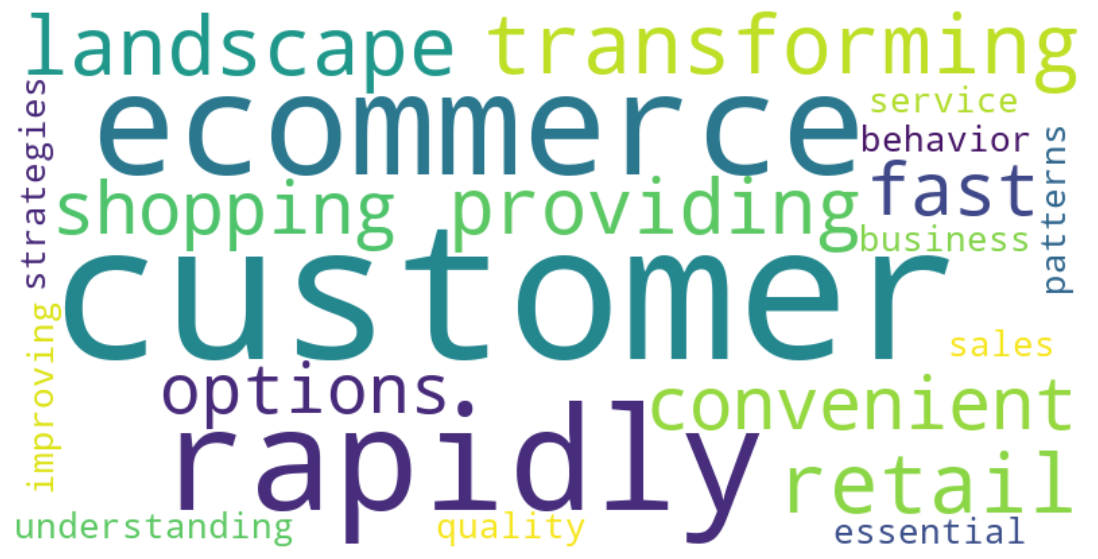

In [43]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Télécharger les ressources NLTK nécessaires (à faire une fois)
nltk.download('punkt')
nltk.download('stopwords')

# texte source (un extrait d'article)
texte = """
E-commerce is rapidly transforming the retail landscape by providing customers with 
convenient and fast shopping options. Understanding customer behavior and sales 
patterns is essential for improving service quality and business strategies.
"""

# 1. Nettoyage du texte : minuscules, suppression ponctuation
texte = texte.lower()  # tout en minuscules
texte = texte.translate(str.maketrans('', '', string.punctuation))  # suppression ponctuation

# 2. Tokenisation
from nltk.tokenize import wordpunct_tokenize
tokens = wordpunct_tokenize(texte)

# 3. Suppression des stopwords
stop_words = set(stopwords.words('english'))
tokens_filtrés = [mot for mot in tokens if mot not in stop_words]

# 4. Création d’un texte nettoyé prêt pour WordCloud
texte_nettoye = " ".join(tokens_filtrés)

# 5. Génération du nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texte_nettoye)

# 6. Affichage
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()